<a href="https://colab.research.google.com/github/andryll/SI2/blob/main/codes/algorithms/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [56]:
def perceptron(dataSet, learningRate = 0.1, maxIt = 100):

# Inicialização
# 1. Iniciar o vetor W com valores aleatórios pequenos. Sugestão: [-1, 1] ou [-0.5, 0.5]
  n_weights = dataSet.shape[1]
  weights = np.ones(n_weights)

  obj = dataSet[:,[n_weights - 1]]
  data = dataSet
  data[:,n_weights -1] = -1

  for i in range(len(weights)):
    weights[i] = np.random.rand() - 0.5
# 2. Iniciar o contador de número de épocas (épocas ← 0)
  epochs = 0
# 3. Iniciar variável de controle (erro ← TRUE)
  error = True
  error_list = []
  mean_errors = []
# 4. Repetir enquanto (error == TRUE & epoca < n.Iter)
  while(error == True and epochs < maxIt):
  # 5. Para todas as amostras de treinamento em X, fazer:
    error = False
    for i in range(data.shape[0]):
      # 6. V = W’ * X //Calcular o sinal do neurônio (spike)
      V = sum(data[i] * weights)
      # 7. Y = phi(V) // Calcular o sinal de saída do neurônio (Y)
      if V >= 0:
        Y = 1
      else:
        Y = 0
      # 8. Se Y (saída obtida) != Di (saída real): // erro na predição
      # print(data[i])
      # print(obj[i])
      # print(Y)
      # print(weights)
      if Y != obj[i]:
        # 9. W = W + η * (Di - Y) * X
        weights = weights + learningRate * (obj[i] - Y) * data[i]
        # 10. erro ← TRUE
        error = True
      # 12. Fim se.
      error_list.append(abs(Y - obj[i]))
    # 13. Fim Para.
    # 11. epocas ← epocas + 1 // Incrementar o contador do numero de épocas
    epochs += 1
    mean_errors.append(sum(error_list)/len(error_list))
    error_list.clear()
  # 14. Fim Repita.
  return weights, epochs, mean_errors
# 15. Fim Pseudocódigo.

In [57]:
a = np.array([[2, 2, 1],[4, 4, 0]])
lr = 0.1
maxIt = 50

weights, epochs, errors = perceptron(a, lr, maxIt)

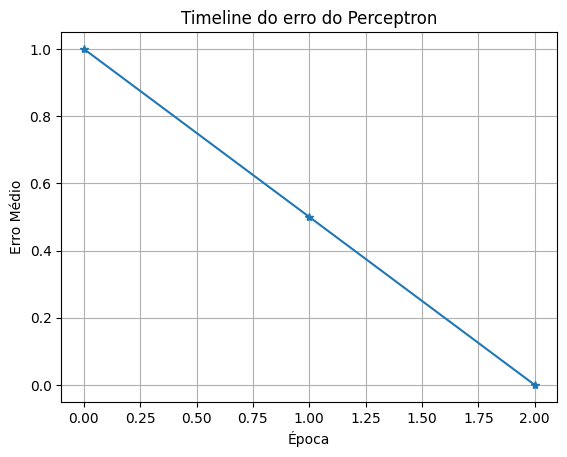

In [58]:
plt.plot(range(epochs), errors, marker = '*')
plt.grid()
plt.ylabel('Erro Médio')
plt.xlabel('Época')
plt.title("Timeline do erro do Perceptron")
plt.show()

In [59]:
or_function = np.array([[0, 0, 0],[0, 1, 1],[1, 0, 1],[1, 1, 1]])
lr = 0.1
maxIt = 100

weights_or, epochs_or, errors_or = perceptron(or_function, lr, maxIt)


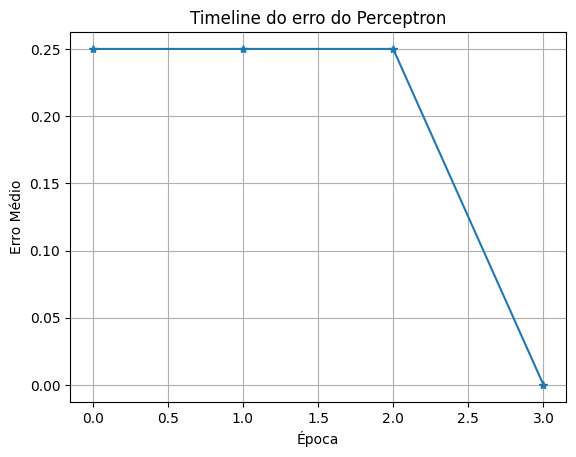

In [60]:
plt.plot(range(epochs_or), errors_or, marker = '*')
plt.grid()
plt.ylabel('Erro Médio')
plt.xlabel('Época')
plt.title("Timeline do erro do Perceptron")
plt.show()

In [61]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

df['target'] = iris.target
target_names = {0:0, 1:1, 2:1}
df['target'] = df['target'].map(target_names)

display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [62]:
iris_np = df.to_numpy()

weights_iris, epochs_iris, errors_iris = perceptron(iris_np, lr, maxIt)


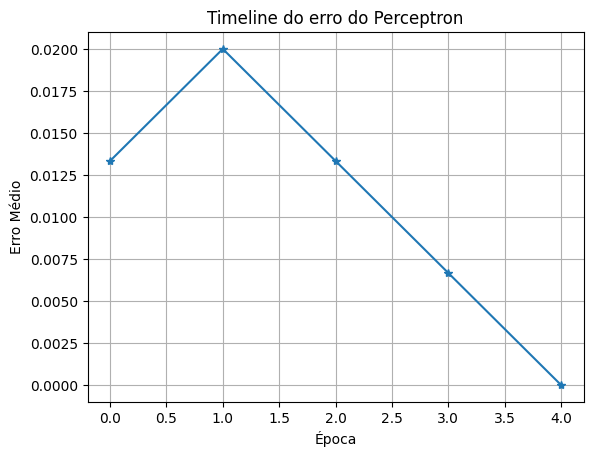

In [63]:
plt.plot(range(epochs_iris), errors_iris, marker = '*')
plt.grid()
plt.ylabel('Erro Médio')
plt.xlabel('Época')
plt.title("Timeline do erro do Perceptron")
plt.show()